# Facial landmark detection

Using the following blog post as a reference:<br>
https://www.pyimagesearch.com/2017/04/03/facial-landmarks-dlib-opencv-python


In [1]:
import dlib
import cv2

In [2]:
def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h) as we would normally do
    # with OpenCV
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
 
    # return a tuple of (x, y, w, h)
    return (x, y, w, h)

In [3]:
def shape_to_np(shape, dtype="int"):
    # initialize the list of (x, y)-coordinates
    coords = np.zeros((68, 2), dtype=dtype)
 
    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)
 
    # return the list of (x, y)-coordinates
    return coords

Needed to ```pip install --upgrade imutils```

In [4]:
# import the necessary packages
# from imutils import face_utils
import numpy as np
import argparse
import imutils

--shape-predictor : This is the path to dlib’s pre-trained facial landmark detector. You can download the detector model here<br> -> http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 <br>
--image : The path to the input image that we want to detect facial landmarks on.

In [5]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
# predictor = dlib.shape_predictor(args["shape_predictor"])
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [6]:
# image = cv2.imread(args["image"])
image = cv2.imread("chai.jpg")
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# detect faces in the grayscale image
rects = detector(gray, 1)

In [7]:
# loop over the face detections
for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the facial landmark (x, y)-coordinates to a NumPy
    # array
    shape = predictor(gray, rect)
#     print(shape)
    shape = shape_to_np(shape)
#     print(shape)
 
    # convert dlib's rectangle to a OpenCV-style bounding box
    # [i.e., (x, y, w, h)], then draw the face bounding box
    (x, y, w, h) = rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
 
    # show the face number
    cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
 
    # loop over the (x, y)-coordinates for the facial landmarks
    # and draw them on the image
    for (x, y) in shape:
        cv2.circle(image, (x, y), 1, (0, 0, 255), -1)
 
# show the output image with the face detections + facial landmarks
# cv2.imshow("Output", image)
cv2.imwrite('landmarks.jpg',image)

True

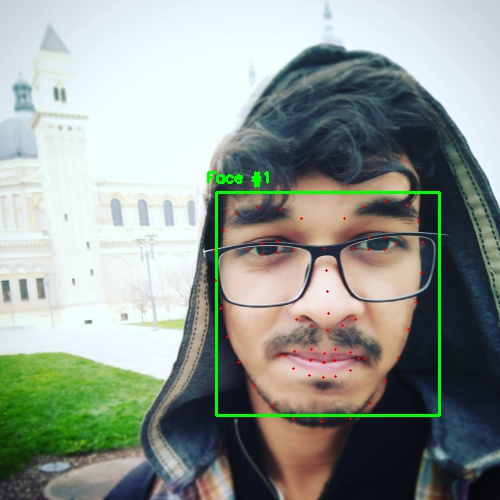

In [8]:
from IPython.display import Image
Image(filename='landmarks.jpg',width = 500,height = 500)

In [9]:
# define a dictionary that maps the indexes of the facial
# landmarks to specific face regions
from collections import OrderedDict
FACIAL_LANDMARKS_IDXS = OrderedDict([
    ("mouth", (48, 68)),
    ("right_eyebrow", (17, 22)),
    ("left_eyebrow", (22, 27)),
    ("right_eye", (36, 42)),
    ("left_eye", (42, 48)),
    ("nose", (27, 35)),
    ("jaw", (0, 17))
])

## Real Time Processing

In [10]:
from imutils.video import VideoStream
from imutils import face_utils
from IPython import display
from PIL import Image

In [11]:
# define a dictionary that maps the indexes of the facial
# landmarks to specific face regions
from collections import OrderedDict
FACIAL_LANDMARKS_IDXS = OrderedDict([
    ("mouth", (48, 68)),
    ("right_eyebrow", (17, 22)),
    ("left_eyebrow", (22, 27)),
    ("right_eye", (36, 42)),
    ("left_eye", (42, 48)),
    ("nose", (27, 35)),
    ("jaw", (0, 17))
])

The mouth corners are identified by landmark indexed at 48 and 54, so we start by accessing these first

In [12]:
def timeout():
    cv2.destroyAllWindows()
    f.close()
    cap.release()
    print('Timeout')

In [13]:
# initialize the video stream and allow the cammera sensor to warmup
import time
from datetime import datetime
from threading import Timer

time.sleep(10.0)
print("[INFO] camera sensor warming up...")

t = Timer(30.0,timeout)
t.start()
cap = cv2.VideoCapture(0)
# vs = VideoStream().start()
# time.sleep(5.0)
# vs.stop()
# loop over the frames from the video stream
f= open("expr_voice.txt","w+")
while True:
    start_time = time.time()
# grab the frame from the threaded video stream, resize it to
    # have a maximum width of 400 pixels, and convert it to
    # grayscale
#     frame = vs.read()
    ret, frame = cap.read()    
#     frame = imutils.resize(frame, width=400)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
    # detect faces in the grayscale frame
    rects = detector(gray, 0)
    # loop over the face detections
    for rect in rects:
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
 
        # loop over the (x, y)-coordinates for the facial landmarks
        # and draw them on the image
        for (x, y) in shape:
            cv2.circle(frame, (x, y), 1, (0, 0, 255), -1)
        
#         llc_x = left_lip_corner_x
        llc_x, llc_y = shape[48]
        rlc_x, rlc_y = shape[54]
        
#         eyelid upper, eyelid lower
        elu_x,elu_y = shape[37]
        ell_x,ell_y = shape[41]
    
        
        (x, y, w, h) = rect_to_bb(rect)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
#         print((ell_y-elu_y)/h)
#         print(shape[37],shape[41])

        smile_param = 0.09
        surprise_param = 0.06
        if(((rlc_x-llc_x)/w)>0.32+smile_param):
            cv2.putText(frame, "Smiling", (x-10, y-10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)
            f.write('Smiling ')
            f.write(time.strftime("%H:%M:%S\n"))
        elif((ell_y-elu_y)/h>surprise_param):
            cv2.putText(frame, "Surprised", (x-10, y-10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)
            f.write('Surprised ')
            f.write(time.strftime("%H:%M:%S\n"))
        else:
            cv2.putText(frame, "Neutral", (x-10, y-10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)
            f.write('Neutral ')
            f.write(time.strftime("%H:%M:%S\n"))
#         cv2.putText(frame, h - ebl_y, (x - 20, y - 20),
#             cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        
#         print((ell_y-y)/w,(elr_y-y)/w)
 
      
    # show the frame
    cv2.imshow("Frame", frame)
    cv2.waitKey(1)
#     key = cv2.waitKey(1) &0xFF
 
#     # if the `q` key was pressed, break from the loop
#     if key == ord("q"):
#         break

# do a bit of cleanup
# cv2.destroyAllWindows()
# vs.stop()

[INFO] camera sensor warming up...
Timeout


error: /Users/jenkins/miniconda/1/x64/conda-bld/conda_1486587097465/work/opencv-3.1.0/modules/imgproc/src/color.cpp:7456: error: (-215) scn == 3 || scn == 4 in function ipp_cvtColor


In [ ]:
f.close()
cap.release()
cv2.destroyAllWindows()

## Identifying Action Units

The following is used as a reference for the facial action units:<br>
https://www.cs.cmu.edu/~face/facs.htm

Various facial expressions can be identified with a combination of Action Units<br>
For eg.<br>
Happiness- AU6(Cheek raiser) + AU12(Lip Corner Puller)

### Mapping Action Units to Facial Landmarks

The action units we will need are:
1. AU26(Jaw Drop)
2. AU12(Lip Corner Puller)
3. AU1(Inner Brow Raiser)
4. AU15(Lip Corner Depressor)
5. AU2(Outer Brow Raiser)
6. AU5(Upper Eyelid Raiser)

In [ ]:
from IPython.display import Image
Image(filename='landmarks.png',width = 500,height = 500)

The corresponding Facial Landmark Points for these Action Units would be:<br>
1. AU26 (Jaw Drop) -> (56,...60)
2. AU12 (Lip Corner Puller) -> (49,55)
3. AU1 (Inner Brow Raiser) -> (21,22,23,24)
4. AU15 (Lip Corner Depressor) ->  (49,55)
5. AU2 (Outer Brow raiser) -> (18,19,26,27)
6. AU5 (Upper Eyelid Raiser) -> (38,39,44,45)

In [ ]:
def action_unit_detector(shape,rect):
    (x, y, w, h) = rect_to_bb(rect)
    
#     AU26 (Jaw Drop) -> (56,...60)
#     lj1 = Lower Jaw 1
    lj1_x, lj1_y = shape[55]
    lj2_x, lj2_y = shape[56]
    lj3_x, lj3_y = shape[57]
    lj4_x, lj4_y = shape[58]
    lj5_x, lj5_y = shape[59]
    
    
    
#     AU12 (Lip Corner Puller) -> (48,54)
#     llc = Left Lip Corner
#     rlc = Right Lip Corner
    llc_x, llc_y = shape[48]
    rlc_x, rlc_y = shape[54]
    
#     AU1 (Inner Brow Raiser) -> (20,21,22,23)
#     lib = Left Inner Brow
#     rib = Right Inner Brow

    lib1_x, lib1_y = shape[20]
    lib2_x, lib2_y = shape[21]
    
    rib1_x, rib1_y = shape[22]
    rib2_x, rib2_y = shape[23]
    
    
#     Detecting Smile
#     print((rlc_x-llc_x)/w)
        
    smile_param = 0.09
    if(((rlc_x-llc_x)/w)>0.32+smile_param):
        cv2.putText(frame, "Smiling", (x-10, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)
    